# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [2]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [3]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.6 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [49]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 7.90MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 3.87MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 31.8MB/s]


In [6]:
data = pd.read_csv('./train.csv')

In [7]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [8]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [9]:
# выводим случайные десять строк датасета
data.sample(10, random_state=42)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1448,9,45.40,418.8,Male,0,No,No,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
4792,37,70.35,2552.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,0
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
3964,44,100.10,4378.35,Male,0,No,No,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),0
240,25,20.95,495.15,Male,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),0
1942,39,50.75,2011.4,Female,0,No,No,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
1859,52,79.20,4016.3,Male,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,0
2348,1,74.40,74.4,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
2280,6,50.80,288.05,Female,0,No,No,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),1
733,21,68.65,1493.2,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0


In [10]:
# вывод типов данных каждого признака
data.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                   object
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

In [11]:
# TotalSpent имеет тип object, но, судя по значениям, должен иметь тип float
# target решила сделать bool, чтобы в describe() не считалась его статистика
# Параметр error='coerce' - любые значения, которые не могут быть преобразованы в float, заменяются на NaN.
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')
data[target_col] = data[target_col].astype('bool')

In [12]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [13]:
# пропущенные значения можно заменить на среднее значение
data.fillna(data['TotalSpent'].mean(), inplace=True)

In [14]:
# Посмотрим на кол-во дубликатов
data.duplicated().sum()

14

In [15]:
# Удалим дубликаты
data = data.drop_duplicates()

In [16]:
data_origin = data.copy()

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [17]:
data.describe()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen
count,5268.000000,5268.000000,5268.000000,5268.000000
mean,32.480448,64.977563,2297.360225,0.159643
std,24.529439,30.176025,2267.126671,0.366310
min,0.000000,18.250000,18.800000,0.000000
25%,9.000000,35.537500,405.362500,0.000000
50%,29.000000,70.450000,1418.650000,0.000000
75%,55.000000,90.050000,3808.637500,0.000000
max,72.000000,118.750000,8684.800000,1.000000


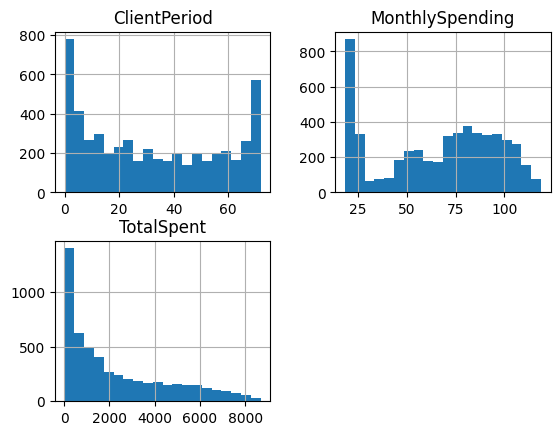

In [18]:
# Построим гистограммы для числовых признаков
data.hist(num_cols, bins=20);

In [19]:
# Посмотрим на распределение категориальных признаков
for col in cat_cols:
    print(data[col].value_counts())
    print()

Sex
Male      2647
Female    2621
Name: count, dtype: int64

IsSeniorCitizen
0    4427
1     841
Name: count, dtype: int64

HasPartner
No     2691
Yes    2577
Name: count, dtype: int64

HasChild
No     3662
Yes    1606
Name: count, dtype: int64

HasPhoneService
Yes    4747
No      521
Name: count, dtype: int64

HasMultiplePhoneNumbers
No                  2497
Yes                 2250
No phone service     521
Name: count, dtype: int64

HasInternetService
Fiber optic    2335
DSL            1798
No             1135
Name: count, dtype: int64

HasOnlineSecurityService
No                     2604
Yes                    1529
No internet service    1135
Name: count, dtype: int64

HasOnlineBackup
No                     2324
Yes                    1809
No internet service    1135
Name: count, dtype: int64

HasDeviceProtection
No                     2309
Yes                    1824
No internet service    1135
Name: count, dtype: int64

HasTechSupportAccess
No                     2596
Yes         

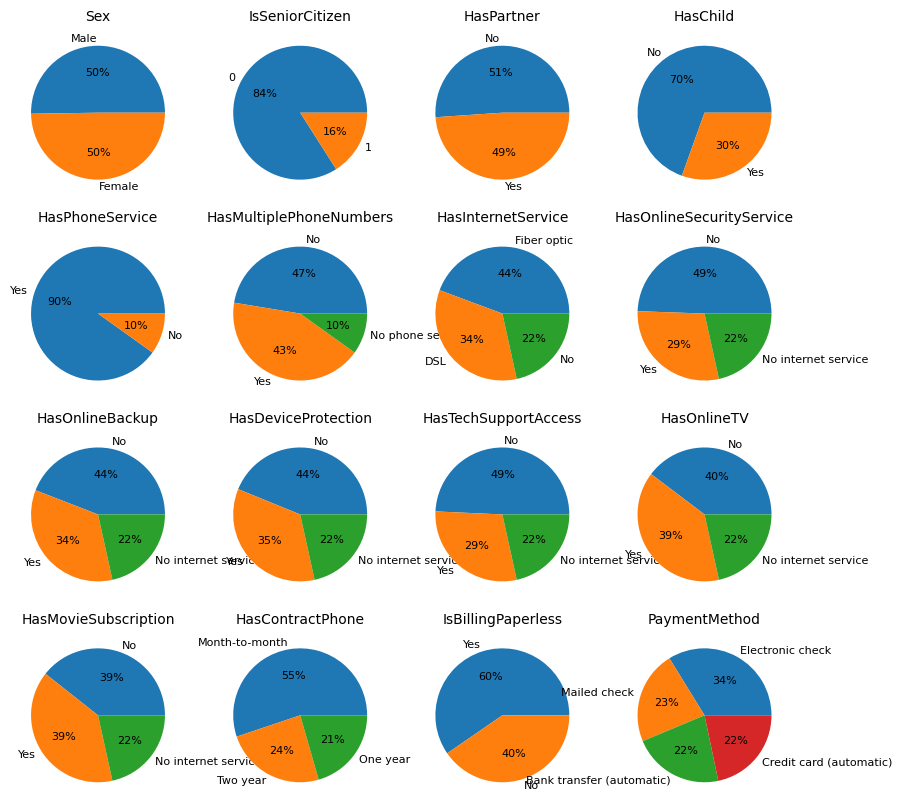

In [20]:
# построим круговые диаграммы для категориальных признаков
fig, axes = plt.subplots(4, 4, figsize=(10, 10))  # создаем сетку 4 x 4
axes = axes.flat  # переводим 4 x 4 в 16

for i, col in enumerate(cat_cols):
    values = data[col].value_counts()
    axes[i].pie(values, labels=values.index, autopct='%.0f%%', textprops={'fontsize': 8})
    axes[i].set_title(col, fontsize=10)
plt.show();

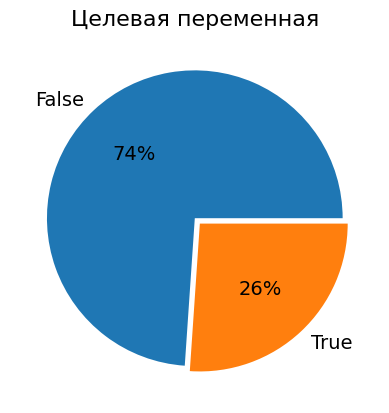

In [21]:
# Распределение целевой переменной
data['Churn'].value_counts().plot.pie(autopct='%.0f%%', explode=[0,0.05], textprops={'fontsize': 14})
plt.title('Целевая переменная', fontsize=16)
plt.ylabel('');

<Axes: xlabel='Churn'>

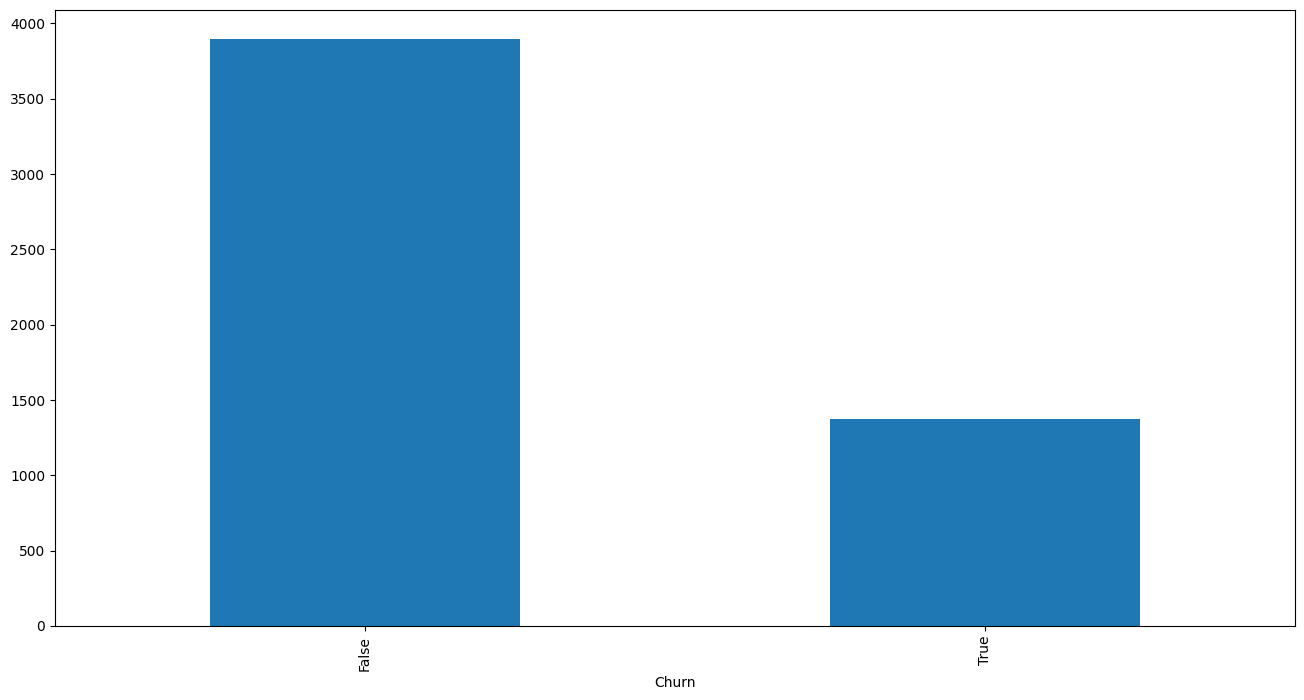

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
data[target_col].value_counts().plot(kind='bar', ax=ax)

In [23]:
# Матрица корреляций для num_cols
data.corr(numeric_only=True).style.background_gradient(cmap='coolwarm').format(precision=2)

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn
ClientPeriod,1.00,0.25,0.82,0.01,-0.35
MonthlySpending,0.25,1.00,0.65,0.22,0.19
TotalSpent,0.82,0.65,1.00,0.09,-0.20
IsSeniorCitizen,0.01,0.22,0.09,1.00,0.16
Churn,-0.35,0.19,-0.20,0.16,1.00


In [24]:
# one-hot-encoding и обновление списка категориальных фичей
data = pd.get_dummies(data, columns=cat_cols, drop_first=True)
data

,ClientPeriod,MonthlySpending,TotalSpent,Churn,Sex_Male,IsSeniorCitizen_1,HasPartner_Yes,HasChild_Yes,HasPhoneService_Yes,HasMultiplePhoneNumbers_No phone service,...,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,False,True,False,True,True,True,False,...,True,False,True,False,True,False,False,False,False,True
1,72,25.85,1872.20,False,True,False,True,False,True,False,...,True,False,True,False,False,True,False,True,False,False
2,1,75.90,75.90,True,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
3,32,79.30,2570.00,False,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,True
4,60,115.25,6758.45,False,False,False,True,True,True,False,...,False,True,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
5278,50,44.45,2188.45,False,True,False,True,False,False,True,...,False,True,False,False,True,False,True,False,False,False
5279,1,55.05,55.05,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
5280,29,76.00,2215.25,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,True,False,False


In [25]:
data.corr(numeric_only=True).style.background_gradient(cmap='coolwarm').format(precision=2)

,ClientPeriod,MonthlySpending,TotalSpent,Churn,Sex_Male,IsSeniorCitizen_1,HasPartner_Yes,HasChild_Yes,HasPhoneService_Yes,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
ClientPeriod,1.00,0.25,0.82,-0.35,0.01,0.01,0.37,0.14,0.01,-0.01,0.33,0.02,-0.04,-0.04,0.33,-0.04,0.36,-0.04,0.36,-0.04,0.32,-0.04,0.27,-0.04,0.29,0.20,0.56,0.01,0.23,-0.21,-0.22
MonthlySpending,0.25,1.00,0.65,0.19,-0.01,0.22,0.09,-0.13,0.25,-0.25,0.48,0.79,-0.76,-0.76,0.29,-0.76,0.44,-0.76,0.48,-0.76,0.33,-0.76,0.63,-0.76,0.63,0.00,-0.07,0.34,0.04,0.26,-0.37
TotalSpent,0.82,0.65,1.00,-0.20,0.01,0.09,0.31,0.05,0.12,-0.12,0.47,0.36,-0.37,-0.37,0.42,-0.37,0.51,-0.37,0.53,-0.37,0.43,-0.37,0.51,-0.37,0.53,0.16,0.36,0.16,0.19,-0.06,-0.29
Churn,-0.35,0.19,-0.20,1.00,-0.01,0.16,-0.15,-0.16,0.01,-0.01,0.04,0.30,-0.23,-0.23,-0.18,-0.23,-0.09,-0.23,-0.07,-0.23,-0.16,-0.23,0.06,-0.23,0.05,-0.17,-0.30,0.19,-0.14,0.30,-0.09
Sex_Male,0.01,-0.01,0.01,-0.01,1.00,0.01,0.00,0.01,-0.01,0.01,-0.00,-0.00,0.01,0.01,-0.01,0.01,-0.01,0.01,-0.00,0.01,-0.02,0.01,-0.01,0.01,-0.01,0.01,-0.01,-0.02,-0.01,0.00,0.01
IsSeniorCitizen_1,0.01,0.22,0.09,0.16,0.01,1.00,0.02,-0.22,0.01,-0.01,0.13,0.25,-0.18,-0.18,-0.04,-0.18,0.07,-0.18,0.05,-0.18,-0.06,-0.18,0.10,-0.18,0.12,-0.05,-0.12,0.15,-0.03,0.17,-0.15
HasPartner_Yes,0.37,0.09,0.31,-0.15,0.00,0.02,1.00,0.44,0.00,-0.00,0.13,-0.01,0.01,0.01,0.14,0.01,0.13,0.01,0.15,0.01,0.12,0.01,0.12,0.01,0.12,0.07,0.25,-0.01,0.08,-0.09,-0.09
HasChild_Yes,0.14,-0.13,0.05,-0.16,0.01,-0.22,0.44,1.00,-0.01,0.01,-0.03,-0.18,0.15,0.15,0.08,0.15,0.02,0.15,0.00,0.15,0.06,0.15,-0.02,0.15,-0.04,0.07,0.20,-0.10,0.06,-0.15,0.06
HasPhoneService_Yes,0.01,0.25,0.12,0.01,-0.01,0.01,0.00,-0.01,1.00,-1.00,0.29,0.30,0.17,0.17,-0.10,0.17,-0.04,0.17,-0.07,0.17,-0.10,0.17,-0.02,0.17,-0.03,0.00,0.00,0.02,-0.01,0.00,-0.01
HasMultiplePhoneNumbers_No phone service,-0.01,-0.25,-0.12,-0.01,0.01,-0.01,-0.00,0.01,-1.00,1.00,-0.29,-0.30,-0.17,-0.17,0.10,-0.17,0.04,-0.17,0.07,-0.17,0.10,-0.17,0.02,-0.17,0.03,-0.00,-0.00,-0.02,0.01,-0.00,0.01


In [26]:
cat_cols_new = []
for col_name in cat_cols:
    cat_cols_new.extend(filter(lambda x: x.startswith(col_name), data.columns))

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [27]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [28]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [29]:
from sklearn.preprocessing import StandardScaler

pca = StandardScaler()

X = pca.fit_transform(data[num_cols + cat_cols_new])

In [30]:
# разделение на обучающую и тестовую выборки
y = data['Churn']

# так как присутсвует дисбаланс целевой переменной, то обязательно зададим параметр stratify
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [31]:
from sklearn.metrics import roc_auc_score, roc_curve

In [32]:
# зададим функцию для построения ROC-кривой и выведения AUC
def plot_roc_auc(y_train, y_train_predicted, y_test, y_test_predicted, title=None):
    train_auc = roc_auc_score(y_train, y_train_predicted)
    test_auc = roc_auc_score(y_test, y_test_predicted)

    plt.figure(figsize=(8, 6.5))
    plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
    plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))

    legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")

    plt.title(title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
    plt.show();

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

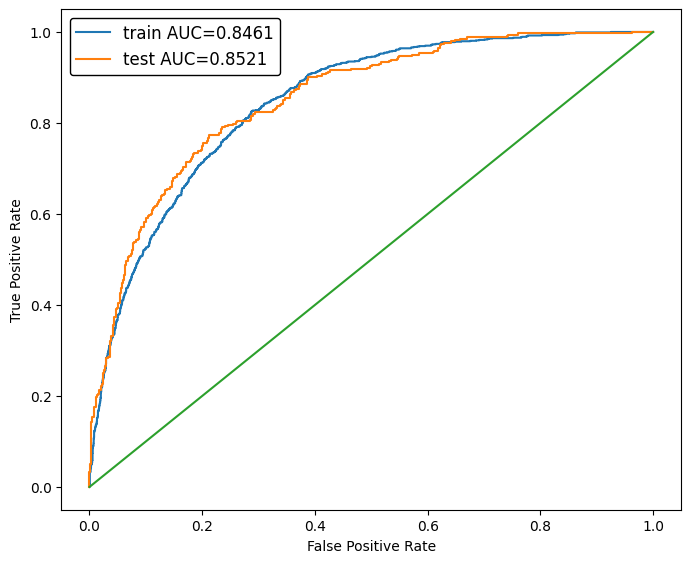

{'C': 1.0, 'penalty': 'l2'}


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Оптимизация гиперпараметров логи. регрессии
clf = LogisticRegression()

param_grid = {
    'C': np.arange(1, 5, 0.5),
    'penalty': ['l1', 'l2']
}
search = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5, refit=True, scoring='accuracy')
search.fit(X_train, y_train)
y_train_pred = search.predict_proba(X_train)[:, 1]
y_valid_pred = search.predict_proba(X_valid)[:, 1]

plot_roc_auc(y_train, y_train_pred, y_valid, y_valid_pred)

print(search.best_params_)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [34]:
# разделение на обучающую и тестовую выборки
y = data_origin['Churn']
X_train_new, X_valid_new, y_train_new, y_valid_new = train_test_split(data_origin[num_cols + cat_cols], y, test_size=0.25, stratify=y, random_state=42)

In [35]:
import catboost

0:	total: 22.4ms	remaining: 4.45s
1:	total: 43.7ms	remaining: 4.32s
2:	total: 64.6ms	remaining: 4.25s
3:	total: 80.5ms	remaining: 3.94s
4:	total: 98ms	remaining: 3.82s
5:	total: 116ms	remaining: 3.74s
6:	total: 131ms	remaining: 3.61s
7:	total: 147ms	remaining: 3.52s
8:	total: 160ms	remaining: 3.39s
9:	total: 176ms	remaining: 3.35s
10:	total: 187ms	remaining: 3.22s
11:	total: 194ms	remaining: 3.04s
12:	total: 211ms	remaining: 3.04s
13:	total: 238ms	remaining: 3.16s
14:	total: 253ms	remaining: 3.12s
15:	total: 275ms	remaining: 3.16s
16:	total: 291ms	remaining: 3.14s
17:	total: 307ms	remaining: 3.1s
18:	total: 324ms	remaining: 3.09s
19:	total: 342ms	remaining: 3.08s
20:	total: 357ms	remaining: 3.04s
21:	total: 374ms	remaining: 3.02s
22:	total: 380ms	remaining: 2.92s
23:	total: 395ms	remaining: 2.9s
24:	total: 410ms	remaining: 2.87s
25:	total: 428ms	remaining: 2.86s
26:	total: 435ms	remaining: 2.79s
27:	total: 457ms	remaining: 2.81s
28:	total: 465ms	remaining: 2.74s
29:	total: 482ms	remain

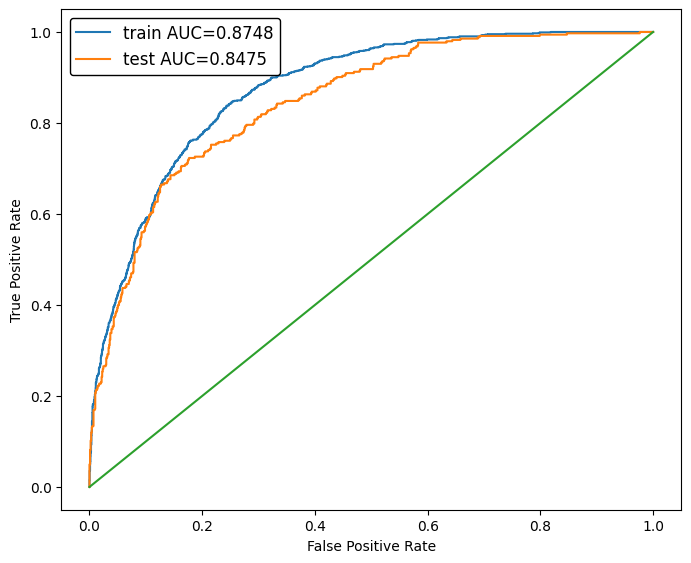

In [60]:
boosting_model = catboost.CatBoostClassifier(n_estimators=200, learning_rate=0.05, cat_features=cat_cols, eval_metric='AUC')

boosting_model.fit(X_train_new, y_train_new)

y_train_pred_new = boosting_model.predict_proba(X_train_new)[:, 1]
y_valid_pred_new = boosting_model.predict_proba(X_valid_new)[:, 1]

plot_roc_auc(y_train_new, y_train_pred_new, y_valid_new, y_valid_pred_new)

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

ВАШ ОТВЕТ: на test 0.8521, лог. регрессия с параметрами {C: 1.0, penalty: l2}; на train Град. бустинг - {n_estimators=200, learning_rate=0.05}

# Предсказания

In [50]:
test = pd.read_csv('./test.csv')
test.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                   object
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
dtype: object

In [51]:
test['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')
test.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  3
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64

In [52]:
test.fillna(test['TotalSpent'].mean(), inplace=True)
test = test.drop_duplicates()

In [58]:
best_model = boosting_model

In [59]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')
submission['Churn'] = best_model.predict_proba(test)[:, 1]  # используйте best_model.predict_proba(X_test), не забудьте выделить вероятность класса 1.
submission.to_csv('./my_submission.csv')

Лучшее решение отправьте в Stepik.

In [55]:
import pandas as pd

df = pd.read_csv('my_submission.csv')
df = df.iloc[:, 1:]
df.to_csv('output.csv', index=False)